In [1]:
%load_ext autoreload
%autoreload 2

# Create bed files of peaks set

In [8]:
import pickle

with open('../results/background_GC_matched.pkl', 'rb') as file:
    peaks = pickle.load(file) 

In [9]:
peaks

,chr,start,end,sequence
GC_cont,,,,
1:14154-15100,X,153066000,153070096,TGCCCCACCAACGCTCCTCCAGAGGGACTTGACTTCAATGAGTTGA...
1:15698-16677,14,105454000,105458096,CGCTGTAGGCTCCTCCCAGGCATGGCCGGGAGCTGTGGGGGCTCCT...
1:17116-17963,10,79848000,79852096,CTGCCTCCTCCAGCCACACCGAGGCTTGAACCTCGAGGACCCCCGG...
1:28903-29812,7,158174000,158178096,CCGAGGTGACATACATCCTCAGCTTATGAAGATGATGGGATTAAGA...
1:180637-181553,11,6454000,6458096,CAAGAGGAGGACTGCTATAGAAGTAGCAGGTGTTTGGAAGAGAGTG...
...,...,...,...,...
Y:56724332-56725266,1,122534000,122538096,TTTTTTTCATGTAAGGCTAGACAGAAGAATTCTCAGTAACTTCCTT...
Y:56727619-56728608,4,87346000,87350096,GACCAGTATCTCTTAGGAATATAGATGCAAAAATTCTCAACAAAAG...
Y:56763067-56763979,1,116528000,116532096,AATCCTCCCGTCTTGGCCTCACAAAGTGTTGGGATTATAGGCATAA...


In [10]:
peaks.iloc[:,0:3].to_csv('../results/background.bed', header=False, index=False, sep='\t')

# Create bed file of peaks with flanking regions

In [33]:
import pickle

with open('../results/peaks_seq.pkl', 'rb') as file:
    peaks = pickle.load(file) 

In [34]:
len_seq = 4096
peaks.start = peaks.middle_peak - int(len_seq/2)
peaks.end = peaks.middle_peak + int(len_seq/2)

peaks

,chr,start,end,middle_peak,sequence,GC_cont
peakID,,,,,,
1:14154-15100,1,12579,16675,14627,GCCCACCGGCCCCAGGCTCCTGTCTCCCCCCAGGTGTGTGGTGATG...,0.585938
1:15698-16677,1,14140,18236,16188,GGCCATTAGGCTCTCAGCATGACTATTTTTAGAGACCCCGTGTCTG...,0.599854
1:17116-17963,1,15492,19588,17540,GGCTGACCATTGCCTTGGACCGCTCTTGGCAGTCGAAGAAGATTCT...,0.597168
1:28903-29812,1,27310,31406,29358,CACATGCAGCCACTGAGCACTTGAAATGTGGATAGTCTGAATTGAG...,0.489746
1:180637-181553,1,179047,183143,181095,ATGCTGATGGATTGTCAGCTTCCCAGATGTGCAAGAATCTCTCCTC...,0.537109
...,...,...,...,...,...,...
Y:56724332-56725266,Y,56722751,56726847,56724799,ACGGAATGGAATGGAATCCAAAGGAATGGAATAGAATGGAATGGAA...,0.389404
Y:56727619-56728608,Y,56726066,56730162,56728114,TGGAATGCACTCGAATGCAATGGAGTCGAAACAAATGGACTGGAAT...,0.391602
Y:56763067-56763979,Y,56761475,56765571,56763523,TGGAAGGGAGTGTAATGCAAGGTTCTCGAAAATAATGGAATCGAAT...,0.393555


In [35]:
peaks.iloc[:,0:3].to_csv('../results/peaks_flanking.bed', header=False, index=False, sep='\t')

In [36]:
import subprocess
import pandas as pd

sort_bed = "sortBed -i  ../results/peaks_flanking.bed  > ../results/peaks_sorted.bed"
subprocess.run(sort_bed, shell=True)

CompletedProcess(args='sortBed -i  ../results/peaks_flanking.bed  > ../results/peaks_sorted.bed', returncode=0)

In [37]:
merge_bedtools = "bedtools merge -i ../results/peaks_sorted.bed -c 1 -o count > ../results/count_peaks.bed"
subprocess.run(merge_bedtools, shell=True)

peaks = pd.read_csv("../results/count_peaks.bed" ,header=None, sep='\t', low_memory=False)
peaks

,0,1,2,3
0,1,12579,19588,3
1,1,27310,31406,1
2,1,179047,188704,3
3,1,189440,193536,1
4,1,197068,201164,1
...,...,...,...,...
163665,Y,56705025,56709121,1
163666,Y,56722751,56730162,2
163667,Y,56761475,56765571,1
163668,Y,56827523,56831619,1


<Axes: >

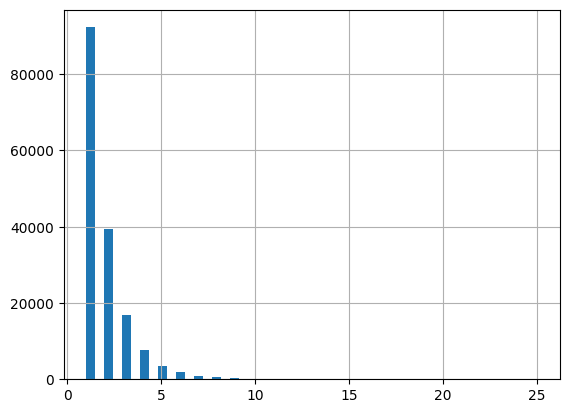

In [41]:
peaks.iloc[:,3].hist(bins=50)